In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape # 50k images, 32x32 pixels, 3 channels (RGB)

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train.shape # 50k labels

(50000, 1)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    # plt.figure(figsize = (10,1))
    plt.matshow(x_train[index])
    plt.xlabel(y_train[index])
    

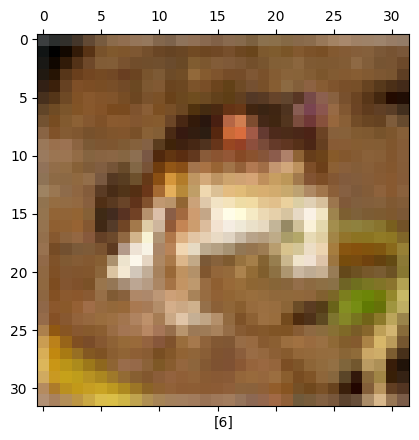

In [9]:
plot_sample(0)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[:10]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [12]:
y_train_categorical[93]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
x_train = x_train / 255

In [14]:
from tensorflow.keras.models import save_model, load_model

In [17]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000, 1)
(50000, 32, 32, 3)
(50000, 1)


In [18]:
x_test=x_test/255

In [48]:
import os
import tensorflow as tf
from tensorflow import keras

model_path = 'model1.keras'

if not os.path.exists(model_path):
    model = keras.Sequential([
        keras.layers.InputLayer(shape=(32, 32, 3)),
        keras.layers.Flatten(),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

    history=model.fit(x_train, y_train_categorical, epochs=10)

    model.save(model_path)
else:
    print(f"Model already exists at {model_path}.")
    model = load_model(model_path)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3086 - loss: 1.9252
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4183 - loss: 1.6423
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.4546 - loss: 1.5514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4733 - loss: 1.4918
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4950 - loss: 1.4298
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.5154 - loss: 1.3893
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.5287 - loss: 1.3503
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.5378 - loss: 1.3175
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.5551 - loss: 1.2737
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5641 - loss: 1.2423


In [49]:
np.argmax(model.predict(x_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


8

In [50]:
y_test[1]

array([8], dtype=uint8)

In [54]:
import numpy as np

predictions = model.predict(x_test)

predict_1 = [np.argmax(i) for i in predictions]

predict_1 = np.array(predict_1)
y_test = np.array(y_test)

correct = 0
for i in range(len(predict_1)):
    if predict_1[i] == y_test[i]:
        correct += 1

accuracy = correct / len(predict_1)

print(f'Accuracy: {accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.5182


In [52]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [53]:
predict_1

array([3, 8, 8, ..., 5, 6, 7], dtype=int64)

#### Here the model is not appropriate for the problem. The model is not able to predict the output for the given input with high accuracy